In [13]:
import numpy as np
import pandas as pd

In [14]:
# Load the PIMA dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv(url, names=names)

In [15]:
dataset

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
# Separate features and labels
X = dataset.iloc[:, :-1].values

In [17]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Compute the covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)

In [19]:
cov_matrix

array([[ 1.00130378,  0.12962746,  0.14146618, -0.08177826, -0.07363049,
         0.01770615, -0.03356638,  0.54505093],
       [ 0.12962746,  1.00130378,  0.15278853,  0.05740263,  0.33178913,
         0.2213593 ,  0.13751636,  0.26385788],
       [ 0.14146618,  0.15278853,  1.00130378,  0.2076409 ,  0.08904933,
         0.2821727 ,  0.04131875,  0.23984024],
       [-0.08177826,  0.05740263,  0.2076409 ,  1.00130378,  0.43735204,
         0.39308503,  0.18416737, -0.11411885],
       [-0.07363049,  0.33178913,  0.08904933,  0.43735204,  1.00130378,
         0.19811702,  0.18531222, -0.04221793],
       [ 0.01770615,  0.2213593 ,  0.2821727 ,  0.39308503,  0.19811702,
         1.00130378,  0.14083033,  0.03628912],
       [-0.03356638,  0.13751636,  0.04131875,  0.18416737,  0.18531222,
         0.14083033,  1.00130378,  0.03360507],
       [ 0.54505093,  0.26385788,  0.23984024, -0.11411885, -0.04221793,
         0.03628912,  0.03360507,  1.00130378]])

In [20]:
# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [21]:
eigenvalues

array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
       0.76333832, 0.87667054, 1.03097228])

In [12]:
eigenvectors

array([[-0.1284321 , -0.59378583,  0.01308692, -0.08069115,  0.47560573,
        -0.19359817, -0.58879003,  0.11784098],
       [-0.39308257, -0.17402908, -0.46792282,  0.40432871, -0.46632804,
        -0.09416176, -0.06015291,  0.45035526],
       [-0.36000261, -0.18389207,  0.53549442, -0.05598649, -0.32795306,
         0.6341159 , -0.19211793, -0.01129554],
       [-0.43982428,  0.33196534,  0.2376738 , -0.03797608,  0.48786206,
        -0.00958944,  0.28221253,  0.5662838 ],
       [-0.43502617,  0.25078106, -0.33670893,  0.34994376,  0.34693481,
         0.27065061, -0.13200992, -0.54862138],
       [-0.45194134,  0.1009598 ,  0.36186463, -0.05364595, -0.25320376,
        -0.68537218, -0.03536644, -0.34151764],
       [-0.27061144,  0.122069  , -0.43318905, -0.8336801 , -0.11981049,
         0.08578409, -0.08609107, -0.00825873],
       [-0.19802707, -0.62058853, -0.07524755, -0.0712006 ,  0.10928996,
         0.03335717,  0.71208542, -0.21166198]])

In [22]:
# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues  = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

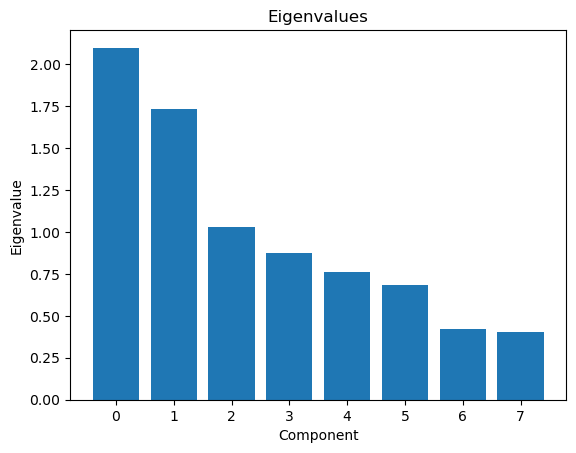

In [23]:
import matplotlib.pyplot as plt

# Plot eigenvalues
plt.bar(range(len(eigenvalues)), eigenvalues)
plt.title('Eigenvalues')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.show()